In [186]:
import pandas as pd
import numpy as np
from colorama import Fore, Back, Style
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

In [165]:
df_cable = pd.read_excel(io = 'cable.xlsx', na_values = ['-', '无'])
df_cable['Is replaceable?'].replace(np.NaN, False, inplace=True)
df_cable.loc[(df_cable['Is replaceable?'] != False),'Is replaceable?']=True

In [187]:
df_cable = df_cable.astype({'Packing standard': str, 'Monitoring condition': str})
df_cable

,Material name and config,Is replaceable?,Cu price,Cu ratio,Material group,Packing standard,Cable outer circumstance,Bending radius,Monitoring condition,Pricing group,Supplier,LF,German Agreed Base Price
0,"ÖLFLEX CLASSIC 100 300/500V 7G1,5",False,150,0.608434,PG01,"100,500,1000",8.9,7.0,A,B1,LCS,1.00,34.362
1,"ÖLFLEX CLASSIC 100 450/750V 3G2,5",False,150,0.447205,PG01,"100,500,1000",9.6,7.0,A,B1,LCS,1.00,29.700
2,"ÖLFLEX CLASSIC 100 450/750V 7G2,5",False,150,0.523364,PG01,"100,500,1000",13.1,7.0,A,B1,LCS,1.00,61.965
3,ÖLFLEX CLASSIC 100 450/750V 7G4,False,150,0.571125,PG01,"100,500,1000",15.4,7.0,A,A1,LCS Imported,1.00,112.500
4,ÖLFLEX CLASSIC 100 450/750V 7G6,False,150,0.619048,PG01,"100,500,1000",17.3,7.0,A,A1,LCS Imported,1.16,175.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,"LANmark-6 RJ45 Patchcord, gesch.,LSZH...",False,0,0.000000,PG24,1,NaN,NaN,nan,A1,LCS Imported,1.16,820.110
1061,"LANmark-6 RJ45 Patchcord, 5m, gesch., LS",False,0,0.000000,PG24,1,NaN,NaN,nan,A1,LCS Imported,1.16,961.090
1062,"LANmark-6 RJ45 Patchcord, 10m, gesch., L",False,0,0.000000,PG24,1,NaN,NaN,nan,A1,LCS Imported,1.16,1284.190
1063,S/FTP Patchkabel CAT.6 1m YL,False,0,0.000000,PG24,5,NaN,NaN,nan,A1,LCS Imported,1.16,434.000


 Is replaceable? 


,Is replaceable?
False,0.944601
True,0.055399


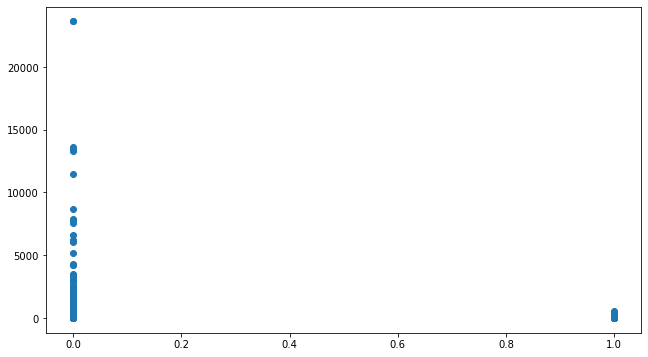



 Cu price 


,Cu price
150,0.657277
0,0.341784
100,0.000939


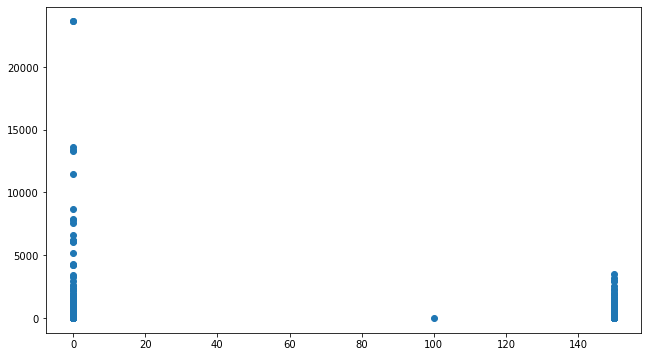



 Cu ratio 


,Cu ratio
0.000000,0.304225
0.640000,0.009390
0.685714,0.006573
0.720000,0.005634
0.750000,0.005634
...,...
0.911111,0.000939
0.544601,0.000939
0.621643,0.000939
0.536747,0.000939


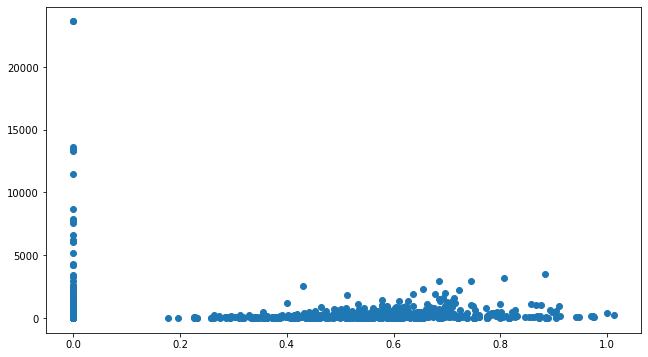



 Material group 


,Material group
PG19,0.199061
PG01,0.131455
PG03,0.110798
PG02,0.078873
PG09,0.075117
PG14,0.059155
PG20,0.049765
PG16,0.041315
PG05,0.038498
PG17,0.030047


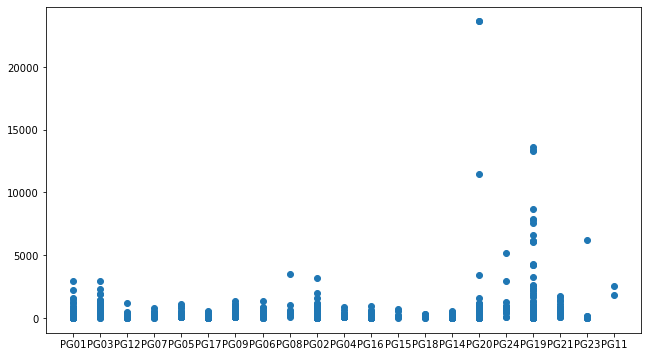



 Packing standard 


,Packing standard
"100,500,1000",0.218779
100,0.107042
50,0.063850
"76,152,305,610",0.060094
"50,100,500,1000",0.053521
...,...
"152,305,500",0.000939
"100,150,300,500,1000",0.000939
"100,300,500",0.000939
"50,250,500,1000",0.000939


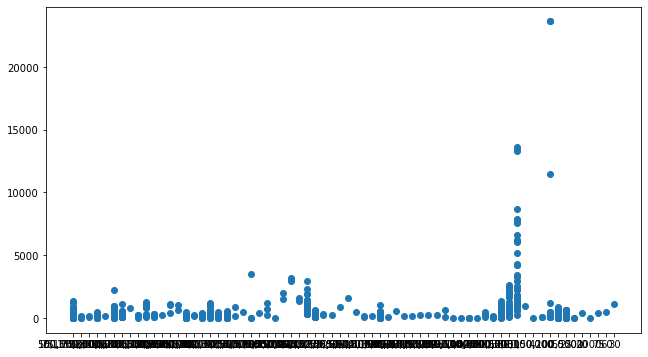



 Cable outer circumstance 


,Cable outer circumstance
NaN,0.299531
8.1,0.016901
8.9,0.015962
6.3,0.014085
9.0,0.013146
...,...
14.1,0.000939
29.0,0.000939
6.4,0.000939
17.4,0.000939


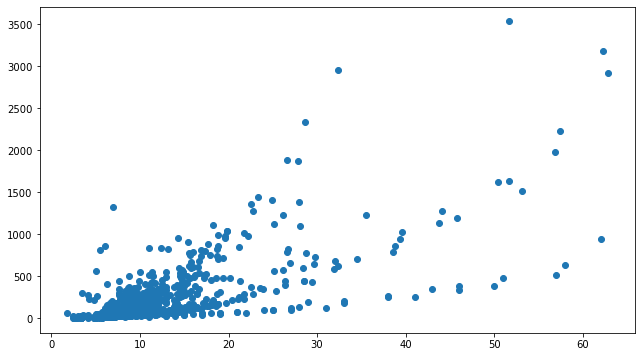



 Bending radius 


,Bending radius
7.0,0.414085
NaN,0.299531
12.0,0.071362
10.0,0.070423
8.0,0.065728
15.0,0.032864
20.0,0.019718
18.0,0.013146
6.0,0.005634
16.0,0.002817


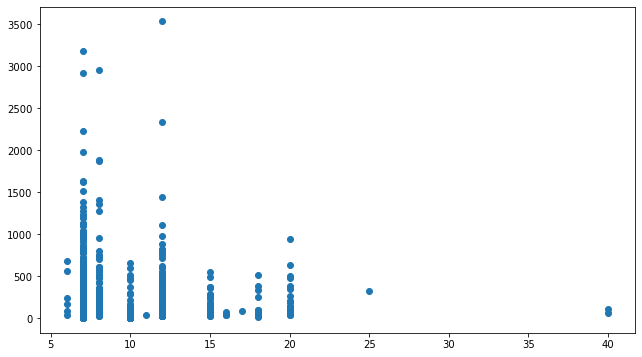



 Monitoring condition 


,Monitoring condition
A,0.612207
nan,0.384977
4xy,0.002817


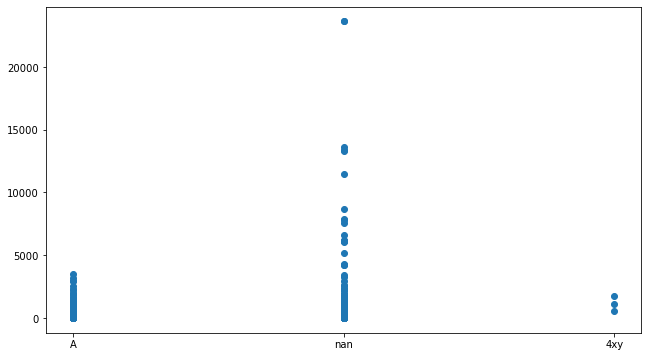



 Pricing group 


,Pricing group
A1,0.824413
B1,0.137089
A2,0.038498


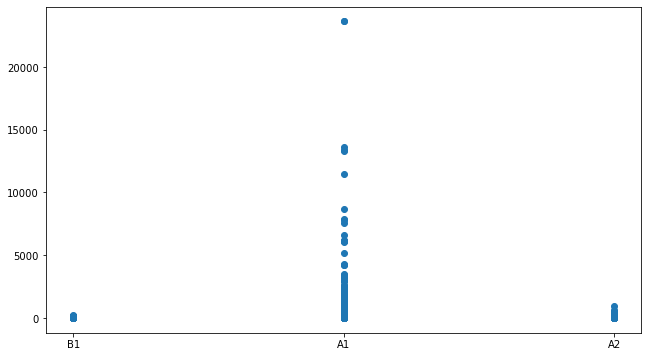



 Supplier  


,Supplier
LCS Imported,0.862911
LCS,0.137089


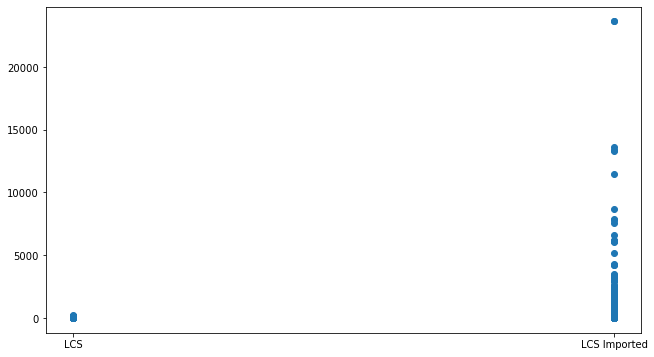



 LF 


,LF
1.16,0.840376
1.00,0.159624


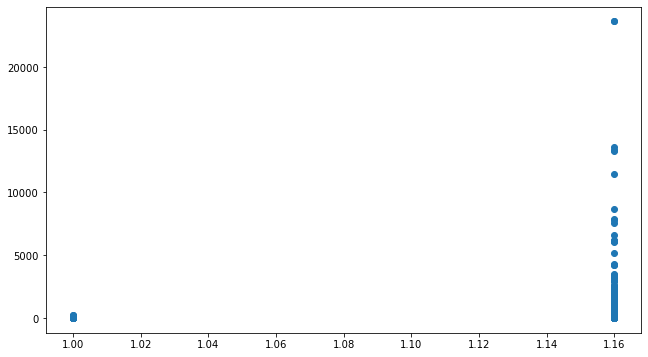

In [185]:
for i in range(1, len(df_cable.columns)-1):
    print(Back.YELLOW, df_cable.columns[i], Style.RESET_ALL)
    display(pd.DataFrame(df_cable.iloc[:,i].value_counts(dropna=False, normalize=True, ascending=False)))
    plt.figure(figsize = (16/1.5,9/1.5))
    plt.scatter(df_cable.iloc[:, i], df_cable.iloc[:,-1])
    plt.show()
    print('\n')

,Cu price,Cu ratio,Cable outer circumstance,Bending radius,LF,German Agreed Base Price
Cu price,1.000000,0.810157,-0.357389,-0.636857,-0.314418,-0.178157
Cu ratio,0.810157,1.000000,0.318078,0.018120,-0.147296,-0.159628
Cable outer circumstance,-0.357389,0.318078,1.000000,0.130822,0.117928,0.686004
Bending radius,-0.636857,0.018120,0.130822,1.000000,0.298931,-0.033455
LF,-0.314418,-0.147296,0.117928,0.298931,1.000000,0.113132
German Agreed Base Price,-0.178157,-0.159628,0.686004,-0.033455,0.113132,1.000000


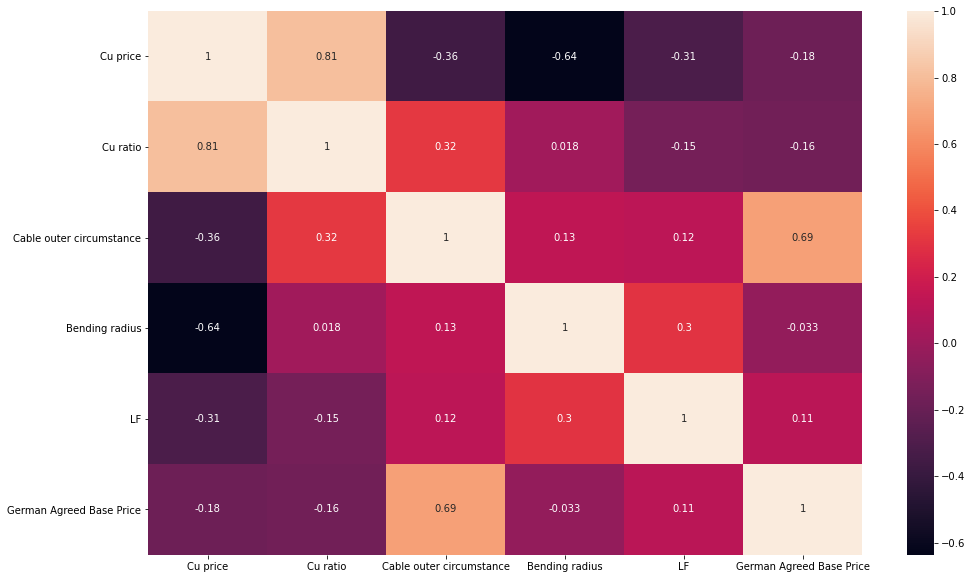

In [182]:
corrMatrix = df_cable.corr()
display(corrMatrix)
plt.figure(figsize = (16,9))
sn.heatmap(corrMatrix, annot=True)
plt.show()

,Is replaceable?,Cu price,Cu ratio,Material group,Packing standard,Cable outer circumstance,Bending radius,Monitoring condition,Pricing group,Supplier,LF
0,False,150,0.608434,PG01,"100,500,1000",8.9,7.0,A,B1,LCS,1.00
1,False,150,0.447205,PG01,"100,500,1000",9.6,7.0,A,B1,LCS,1.00
2,False,150,0.523364,PG01,"100,500,1000",13.1,7.0,A,B1,LCS,1.00
3,False,150,0.571125,PG01,"100,500,1000",15.4,7.0,A,A1,LCS Imported,1.00
4,False,150,0.619048,PG01,"100,500,1000",17.3,7.0,A,A1,LCS Imported,1.16
...,...,...,...,...,...,...,...,...,...,...,...
1060,False,0,0.000000,PG24,1,NaN,NaN,nan,A1,LCS Imported,1.16
1061,False,0,0.000000,PG24,1,NaN,NaN,nan,A1,LCS Imported,1.16
1062,False,0,0.000000,PG24,1,NaN,NaN,nan,A1,LCS Imported,1.16
1063,False,0,0.000000,PG24,5,NaN,NaN,nan,A1,LCS Imported,1.16


In [192]:
# X = df_cable.iloc[:, 1:-1]
X = df_cable[['Cu price', 'Cu ratio', 'Cable outer circumstance', 'Bending radius', 'LF']]
Y = df_cable.iloc[:, -1]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').